In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].astype('category').cat.codes

# Fill NaN values in 'sex' and 'smoker' columns with 0
df['sex'] = df['sex'].fillna(0)
df['smoker'] = df['smoker'].fillna(0)


train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=42)

train_labels = train_dataset.pop('charges')
test_labels = test_dataset.pop('charges')

scaler = StandardScaler()
train_dataset = scaler.fit_transform(train_dataset)
test_dataset = scaler.transform(test_dataset)

In [36]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[train_dataset.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model.fit(train_dataset, train_labels, epochs=100, validation_split=0.2, verbose=0)
print("Model trained successfully!")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model trained successfully!


9/9 - 0s - 23ms/step - loss: 6377.4238 - mae: 6377.4238

✅ Mean Absolute Error: $6377.42
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


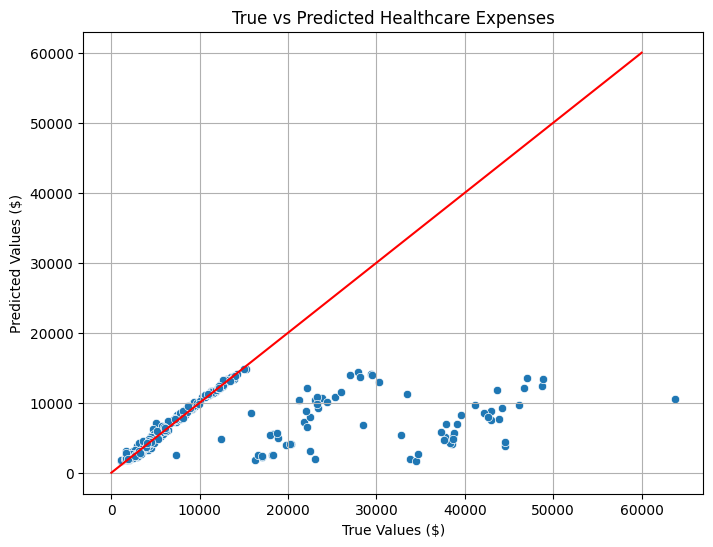

In [37]:
loss, mae = model.evaluate(test_dataset, test_labels, verbose=2)
print(f"\n✅ Mean Absolute Error: ${mae:.2f}")
test_predictions = model.predict(test_dataset).flatten()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=test_labels, y=test_predictions)
plt.xlabel('True Values ($)')
plt.ylabel('Predicted Values ($)')
plt.title('True vs Predicted Healthcare Expenses')
plt.plot([0, 60000], [0, 60000], color='red')
plt.grid(True)
plt.show()
